In [1]:
import sys
sys.path.append("../TI_modules/")
import TI_greensfn_parallel as TI_greensfn
import multiprocessing as mp
import time
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
TIG0=TI_greensfn.init_material(npix=30,pixwid=0.2e-9)

<IPython.core.display.Javascript object>


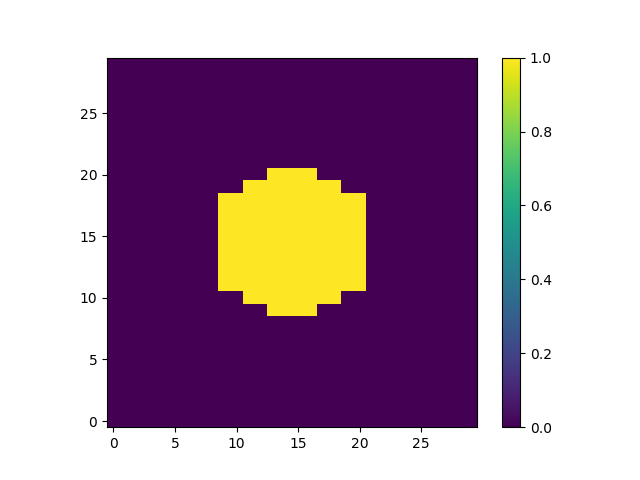

In [3]:
import itertools
npix=TIG0.npix
pad=0.05
x0=np.linspace(-1.,1.,npix)
y0=np.linspace(-1.,1.,npix)
cidx=[t for t in itertools.product(np.arange(npix),np.arange(npix))]
coord=[t for t in itertools.product(x0,y0)]


def hexagonal_well(V0=5,rad=1):
    V=np.zeros(npix**2,float)
    def hexagon(pos):
        s=x0[npix-int(np.ceil(pad*npix))]
        x, y = map(abs, pos)
        return y < 3**0.5 * min(s*rad - x, s*rad / 2)
    
    for i,xy in enumerate(coord):
        if not(hexagon(xy)):
            V[i]=1.
    V=V0*V/max(V)-V0
    return V
    
def return_2D_V(V0=5,rad=1):
    V=hexagonal_well(V0=V0,rad=rad)
    temp_V=np.zeros((npix,npix),float)
    for i,c in enumerate(cidx):
        temp_V[c]=V[i]
    return temp_V

V2d=return_2D_V(rad=0.5,V0=-1) #- return_2D_V(rad=0.45,V0=-1)

figure()
imshow(V2d,origin="lower")
colorbar()

<IPython.core.display.Javascript object>


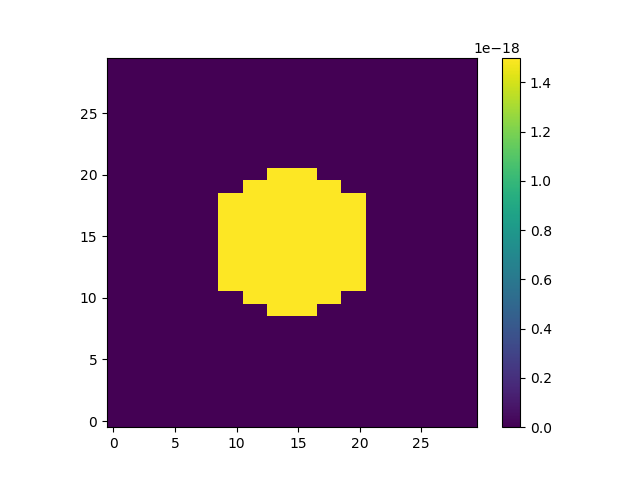

In [4]:
TIG0.setup_potential(vamp=1.5e-18)
TIG0.V=V2d*1.5e-18
TIG0.Vall=np.kron(np.diag(TIG0.V.ravel()),TI_greensfn.cnst.sigma0)
figure()
imshow(abs(TIG0.V),origin="lower")
colorbar()

<IPython.core.display.Javascript object>


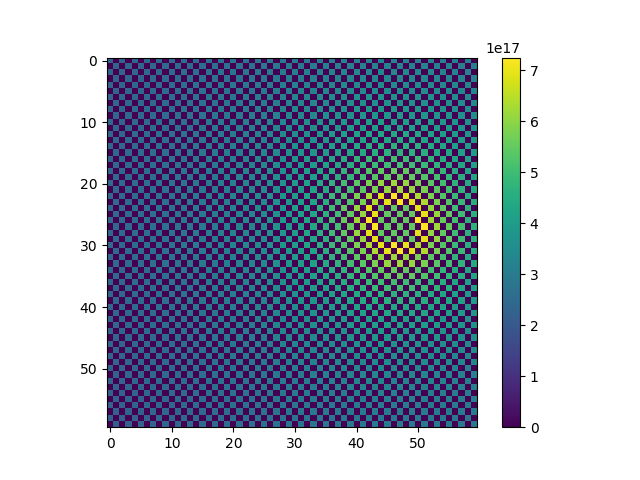

In [5]:
G0=TIG0.return_G0(E=0.2,do_vis=True,x_tip=13,y_tip=23)
figure()
imshow(abs(G0))
colorbar()

In [6]:
start=time.time()
Gnew=TIG0.get_Gnew(E=0.1)
print time.time()-start
# figure()
# imshow((real(Gnew)),origin="lower")
# colorbar()

start=time.time()
Gnew1=TIG0.get_Gnew_fromT(E=0.1)
print time.time()-start
# figure()
# imshow((real(Gnew1)),origin="lower")
# colorbar()

# ldos=TIG0.get_ldos_Gnew(E=-0.2)
# figure()
# imshow(log10(abs(ldos)),origin="lower")
# colorbar()

5.01154899597
4.20982599258


In [7]:
def run_fn(E):
    ldos=TIG0.get_ldos_Gnew(E=E,loc=[20,20])
    return ldos

def run_ldos_in_parallel(numprocs):
    pool=mp.Pool(processes=numprocs)
    ldos=pool.map(run_fn,E)
    pool.close()
    pool.join()
    return ldos

In [43]:
E=linspace(-0.25,0.25,10)

# ldos=np.zeros_like(E)
# for i,omega in enumerate(E):
#     ldos[i]=TIG0.get_ldos_Gnew(E=omega,loc=[20,20])
#     print i,omega,ldos[i]


ldos=run_ldos_in_parallel(6)

<IPython.core.display.Javascript object>


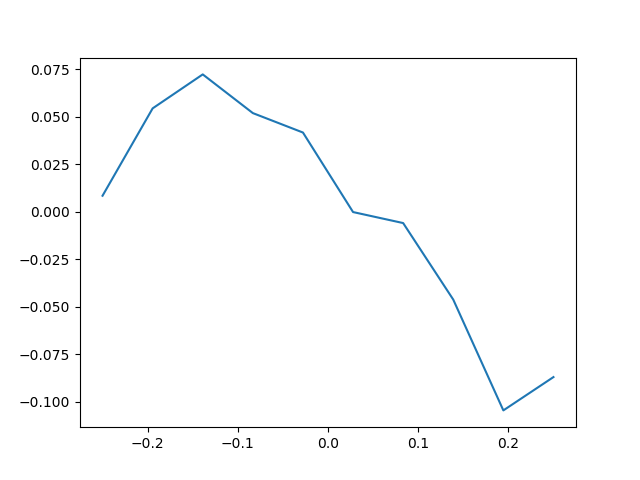

In [44]:
figure()
plot(E,np.array(ldos)/1e18)

In [20]:
def run_fn(E):
    ldos=TIG0.get_ldos_G0(E=E,loc=[20,20])
    return ldos

def run_ldos_in_parallel(numprocs):
    pool=mp.Pool(processes=numprocs)
    ldos=pool.map(run_fn,E)
    pool.close()
    pool.join()
    return ldos

In [21]:
E=linspace(-0.25,0.25,4)

ldos=np.zeros_like(E)
for i,omega in enumerate(E):
    ldos[i]=TIG0.get_ldos_G0(E=omega,loc=[20,20])
    print i,omega,ldos[i]

# ldos=run_ldos_in_parallel(4)

0 -0.25 4.34023109734e+17
1 -0.0833333333333 1.44674375638e+17
2 0.0833333333333 1.44674375638e+17
3 0.25 4.34023109734e+17


<IPython.core.display.Javascript object>


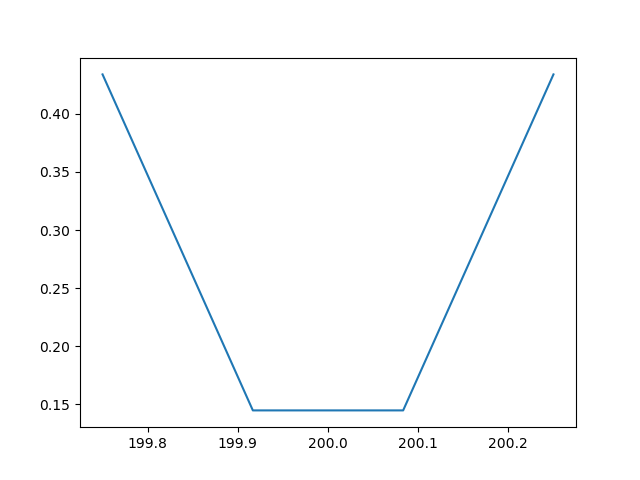

In [22]:
figure()
plot(E+200,np.array(ldos)/1e18)